# Practica: La maldición de la dimensión en Machine Learning 

## Objetivos de la práctica

* Verificar que La distancia media entre los datos aumenta con el número de dimensiones.
* Verificar que la variabilidad de la distancia disminuye exponencialmente con el número 
   de dimensiones. 

### Introducción

¿Sabías que a medida que aumenta el número de dimensiones, la distancia se vuelven un creterio muy debil para hacer clasificaciones? 

A este efecto se le conoce con el nombre de **la Maldición de la Dimensión** y tiene un gran impacto en técnicas de aprendizaje automático basadas en distancias tales como 
* K-Means y 
* KNN (los k vecinos más cercanos).

## Secuencia didáctica	

1. Introducción: La Maldición de la Dimensión  
   1.1 La distancia media aumenta con el número de dimensiones  
   1.2 La variabilidad disminuye exponencialmente  
   1.3 Distribución de distancias a medida que aumenta la dimensión  
2. Intuición Gráfica de la Maldición de la Dimensión  
3. Impacto de la Maldición de la Dimensión en Machine Learning  
4. Mitigando el efecto de la Maldición de la Dimensión  
   4.1 Técnicas de reducción de la dimensionalidad  
   4.2 Aumentar (exponencialmente) la cantidad de datos  
5. Resumen y conclusiones 

## Actividad 1: Verificar que la distancia media aumenta con el número de dimensiones 

La distancia media aumenta con el número de dimensiones  

A medida que el número de dimensiones aumenta, la distancia media entre ellos también aumenta. 

Esto en sí mismo no es muy problemático para el aprendizaje automático. 

### Secuencia de la actividad

* Crear una lista de python `dim` de las dimensiones a considerar.
* Para cada dimensión crear una lista de puntos `p` pertenecientes al intervalo $[0,1]$ y para cada una de estas listas calcular la lista de distancias entre puntos consecutivos utilizando la función `numpy.linalg.norm(p[i] - p[i+1])`
* Para cada lista de distancias calcular el promedio con la función `numpy.mean(distancias)`
* Graficar a la función promedio de distancias `prom_dist` como función de la dimensión `dim`


### Ejecución de la secuencia 

In [23]:
import numpy as np 
dim = [1,2,3,10,100,200,500,800,1000] 
prome_distan = []
for d in dim:
    puntos = np.random.rand(10000,d)
    distancias = [] 
    for j in range(10000-1):
        distancias.append(np.linalg.norm(puntos[j] - puntos[j+1]))  
    prome_distan.append(np.mean(distancias))     

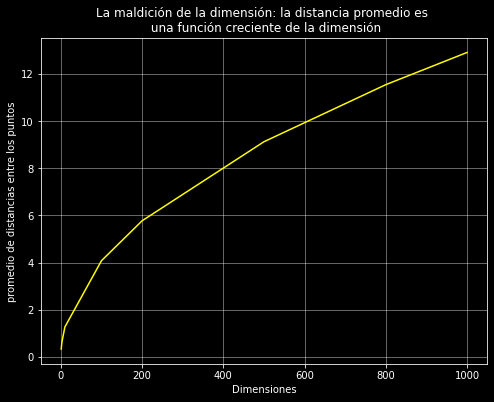

In [37]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,6)) 
plt.plot(dim, prome_distan, color = 'yellow')   
plt.grid(True, alpha = 0.5) 
plt.xlabel('Dimensiones')
plt.ylabel('promedio de distancias entre los puntos')
plt.title('La maldición de la dimensión: la distancia promedio es \n una función creciente de la dimensión')
plt.savefig('función_distancia_promedio.png')
plt.show() 

# Cálculo de la distribución de distancia entre dos puntos en una dimensión 

1. Creación de un arreglo de numpy de números aleatorios que distribuyen uniforme y que pertenecen al intervalo $[0,1]$ de la recta real. 

In [1]:
import numpy as np 
a = np.random.rand(10000)
def dist_1(x1,x2):
    return np.abs(x1 - x2) 
d1 = []
for i in range(len(a)-1):
    d1.append(dist_1(a[i],a[i-1])) 
    
import matplotlib.pyplot as plt 
plt.style.use('dark_background') 

plt.hist(d1) 
plt.show()     

<Figure size 640x480 with 1 Axes>

1. Creación de un arreglo de numpy de números aleatorios que distribuyen uniforme y que pertenecen al intervalo $[0,1]$ de $\mathbb{R}^{2}$. 

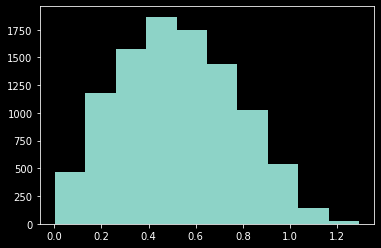

In [6]:
import numpy as np 
a = np.random.rand(10000,2) 
def dist_2(c,d):
    return np.linalg.norm(c-d)  
d1 = []
for i in range(10000-1):
    d1.append(dist_2(a[i,:],a[i-1,:])) 
    
import matplotlib.pyplot as plt 
plt.style.use('dark_background') 

plt.hist(d1) 
plt.show()     

## Distribución de distancias en tres dimensiones 

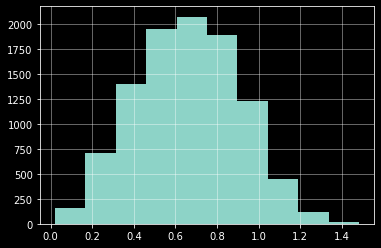

In [12]:
import numpy as np 
d = 3
puntos = np.random.rand(10000,d) 
def dist(c,d):
    return np.linalg.norm(c-d)  
distri = []
for i in range(10000-1):
    distri.append(dist(puntos[i,:],puntos[i+1,:])) 
    
import matplotlib.pyplot as plt 
plt.style.use('dark_background') 

plt.hist(distri) 
plt.grid(True, alpha = 0.5)  
plt.show()    

## Distribución de distancias en diez dimensiones 

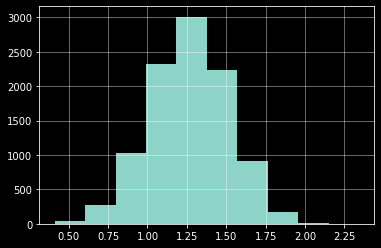

In [14]:
import numpy as np 
d = 10 
puntos = np.random.rand(10000,d) 
def dist(c,d):
    return np.linalg.norm(c-d)  
distri = []
for i in range(10000-1):
    distri.append(dist(puntos[i,:],puntos[i+1,:])) 
    
import matplotlib.pyplot as plt 
plt.style.use('dark_background') 

plt.hist(distri) 
plt.grid(True, alpha = 0.5)  
plt.show()    

## Distribución de distancias en $50$ dimensiones 

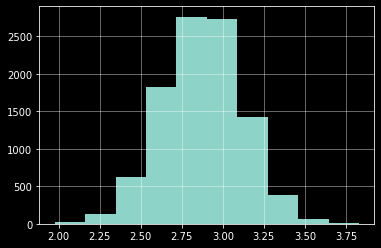

In [15]:
import numpy as np 
d = 50 
puntos = np.random.rand(10000,d) 
def dist(c,d):
    return np.linalg.norm(c-d)  
distri = []
for i in range(10000-1):
    distri.append(dist(puntos[i,:],puntos[i+1,:])) 
    
import matplotlib.pyplot as plt 
plt.style.use('dark_background') 

plt.hist(distri) 
plt.grid(True, alpha = 0.5)  
plt.show()    

## Distribución de distancias en $100$ dimensiones 

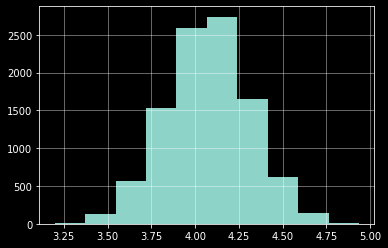

In [16]:
import numpy as np 
d = 100 
puntos = np.random.rand(10000,d) 
def dist(c,d):
    return np.linalg.norm(c-d)  
distri = []
for i in range(10000-1):
    distri.append(dist(puntos[i,:],puntos[i+1,:])) 
    
import matplotlib.pyplot as plt 
plt.style.use('dark_background') 

plt.hist(distri) 
plt.grid(True, alpha = 0.5)  
plt.show()    

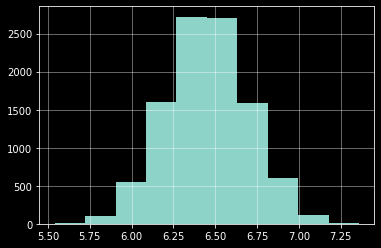

In [17]:
import numpy as np 
d = 250  
puntos = np.random.rand(10000,d) 
def dist(c,d):
    return np.linalg.norm(c-d)  
distri = []
for i in range(10000-1):
    distri.append(dist(puntos[i,:],puntos[i+1,:])) 
    
import matplotlib.pyplot as plt 
plt.style.use('dark_background') 

plt.hist(distri) 
plt.grid(True, alpha = 0.5)  
plt.show()    

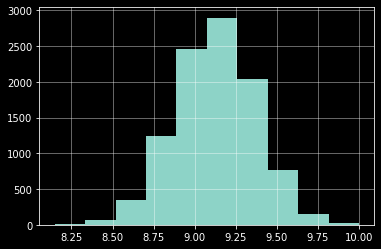

In [18]:
import numpy as np 
d = 500 
puntos = np.random.rand(10000,d) 
def dist(c,d):
    return np.linalg.norm(c-d)  
distri = []
for i in range(10000-1):
    distri.append(dist(puntos[i,:],puntos[i+1,:])) 
    
import matplotlib.pyplot as plt 
plt.style.use('dark_background') 

plt.hist(distri) 
plt.grid(True, alpha = 0.5)  
plt.show()    

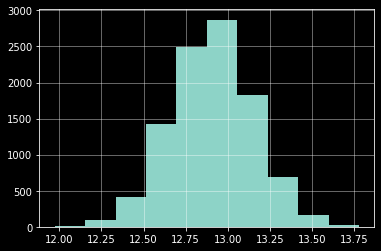

In [19]:
import numpy as np 
d = 1000  
puntos = np.random.rand(10000,d) 
def dist(c,d):
    return np.linalg.norm(c-d)  
distri = []
for i in range(10000-1):
    distri.append(dist(puntos[i,:],puntos[i+1,:])) 
    
import matplotlib.pyplot as plt 
plt.style.use('dark_background') 

plt.hist(distri) 
plt.grid(True, alpha = 0.5)  
plt.show()    

# Mosaico de graficos de distribución de distancias en orden creciente de dimensión

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 3)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

# Segunda parte de la práctica

## Objetivo
* Verificar que la variabilidad disminuye exponencialmente con la dimensión

## Secuencia de actividades para alcanzar el objetivo

[Definición de Coeficiente de variación](https://es.wikipedia.org/wiki/Coeficiente_de_variaci%C3%B3n) 

En estadística, cuando se desea hacer referencia a la relación entre la variabilidad de la variable y el tamaño de la media, se utiliza el coeficiente de variación (suele representarse por las siglas "C.V.").

Su fórmula expresa la desviación estándar como porcentaje de la media aritmética, mostrando una interpretación relativa del grado de variabilidad, independiente de la escala de la variable, a diferencia de la desviación típica o estándar. 

Por otro lado presenta problemas ya que a diferencia de la desviación típica este coeficiente es fuertemente sensible ante cambios de origen en la variable. 

Por ello es importante que todos los valores sean positivos y su media dé, por tanto, un valor positivo. 

A mayor valor del coeficiente de variación mayor heterogeneidad de los valores de la variable; y a menor C.V., mayor homogeneidad en los valores de la variable. 

Por ejemplo, si el C.V es menor o igual al 30%, significa que la media aritmética es representativa del conjunto de datos, por ende el conjunto de datos es "Homogéneo". 

Por el contrario, si el C.V supera al 30%, el promedio no será representativo del conjunto de datos (por lo que resultará "Heterogéneo"). Se calcula:

$$  C_{V} = {\frac{\sigma}{\bar{x}}} $$

Donde {\displaystyle \sigma }\sigma es la desviación típica, y {\displaystyle {\bar {x}}}\bar{x} es la Media. Se puede dar en porcentaje calculando:

$$ {\displaystyle C_{V}={\frac {\sigma }{\bar {x}}}\cdot 100\%}{\displaystyle C_{V}={\frac {\sigma }{\bar {x}}}\cdot 100\%} $$ 

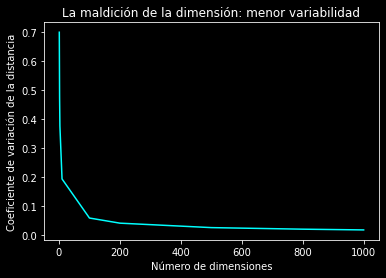

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('dark_background') 

def dist(c,d):
    return np.linalg.norm(c-d)  

dim = [1,2,3,10,100,200,500,800,1000] 
Delta = []
Media = []
for d in dim:
    p = np.random.rand(10000,d) 
    Distancia = []
    for j in range(10000-1):
        Distancia.append(dist(p[j],p[j+1])) 
    Delta.append(np.std(Distancia))
    Media.append(np.mean(Distancia)) 
Delta = np.array(Delta)
Media = np.array(Media) 
cv = Delta/Media 

plt.plot(dim,cv, color = 'cyan')   
plt.ylabel('Coeficiente de variación de la distancia')
plt.xlabel('Número de dimensiones')
plt.title('La maldición de la dimensión: menor variabilidad') 

plt.show()

Esto es terrible para los métodos de aprendizaje automático basados en distancias tales como clustering o los vecinos más cercanos. 

El problema es que cuando hay un gran número de atributos (features), los datos están todos a casi la misma distancia. 

Es decir, no hay variabilidad entre sus distancias.

## Observaciones sobre Python 

* No se pueden dividir listas de Python 
* Pero si se pueden dividir componente a componente los arreglos de numpy.

In [4]:
x=[4,8]
y=[2,4]
import numpy as np 
x = np.array(x)
y = np.array(y)
x/y 

array([2., 2.])

## Referencias 

* https://www.iartificial.net/la-maldicion-de-la-dimension-en-machine-learning/
  [La Maldición de la Dimensión en Machine Learning](https://www.iartificial.net/la-maldicion-de-la-dimension-en-machine-learning/)